<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Introduction to AI and Data Science

Even Semester 2023/2024

Faculty of Computer Science, Universitas Indonesia

## **Lab *3*: *Feature Engineering***

### **Deadline: 24 February 2024, 23:55**
</center>

#### **Guidelines:**

1. Lab document *template* in .ipynb format and dataset (if needed) have been provided on SCeLe.
2. Run the code in the .ipynb document and pay close attention to what the code snippet does and its output. Answer the **asserted questions** in the given program snippet.
3. Jupyter Notebook documents that have been completed with answers are collected in the format **Lab3_NPM_Name.ipynb**. Example: Lab3_2006123456_Budi.ipynb
4. Submit these documents onto the submission slot provided on SCeLe before **24 February 2024, 23:55**. Late submission will incur a score penalty.
5. Plagiarism is not permitted in any form. As for collaboration in the form of discussion (without copying or taking other people's answers) and literature, it is still permitted by properly crediting collaborators and sources.


In [ ]:
NAMA = "Muhammad Sakhran Thayyib"
NPM = "2206046790"

# **Import Dependencies**

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# **Tutorial House Price Dataset**

Source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction, with modifications.

You can download the latest dataset version in: [link](https://drive.google.com/file/d/12AhyUSprMaJqZVJrZVezkMuau1pwl35W/view?usp=sharing)



This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [ ]:
# Alternatively, you could run this code to download the dataset from google drive
meta_url = 'https://drive.google.com/uc?export=download&confirm=pbef&id='
id = '12AhyUSprMaJqZVJrZVezkMuau1pwl35W'
output_path = '/content/house_price.csv'
urllib.request.urlretrieve(meta_url+id, filename=output_path)

('/content/house_price.csv', <http.client.HTTPMessage at 0x7b13505562f0>)

### **Variable Descriptions:**
###### *(if not self-explanatory)*

- `id` - Unique ID for each home sold
- `date` - Date of the home sale
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms (where .5 accounts for a room with a toilet but no shower)
- `sqft_living` - Square footage of the apartment's interior living space
- `sqft_lot` - Square footage of the land space
- `floors` - Number of floors
- `waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not
- `view` - An index from 0 to 4 of how good the view of the property was
- `condition` - A rating of the apartment's overall condition.
- `grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design
- `sqft_above` - The square footage of the interior housing space that is above ground level
- `sqft_basement` - The square footage of the interior housing space that is below ground level
- `yr_built` - The year the house was initially built
- `yr_renovated` - The year of the house’s last renovation
- `zipcode` - What zipcode area the house is in
- `lat` - Latitude
- `long` - Longitude
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


Target variable — `price` - Price of each home sold

In [ ]:
house = pd.read_csv('/content/house_price.csv')
house.head(3)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,Fair,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,Fair,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,Fair,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0


In [ ]:
# Quick look at the dimension
print(f"dimension: {house.shape}")

dimension: (21613, 21)


In [ ]:
# Quick look on the columns
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  object 
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# Numerical features description
house.describe(include='number')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,4.580302e+09,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.401822e+05
std,2.876566e+09,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.673622e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [ ]:
# Object features description
house.describe(include='object')

,date,condition
count,21613,21613
unique,372,5
top,20140623T000000,Fair
freq,142,14031


In [ ]:
# Total unique values on each columns
house.nunique()

id               21436
date               372
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
price             3625
dtype: int64

In [ ]:
# Check the missing values
house.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

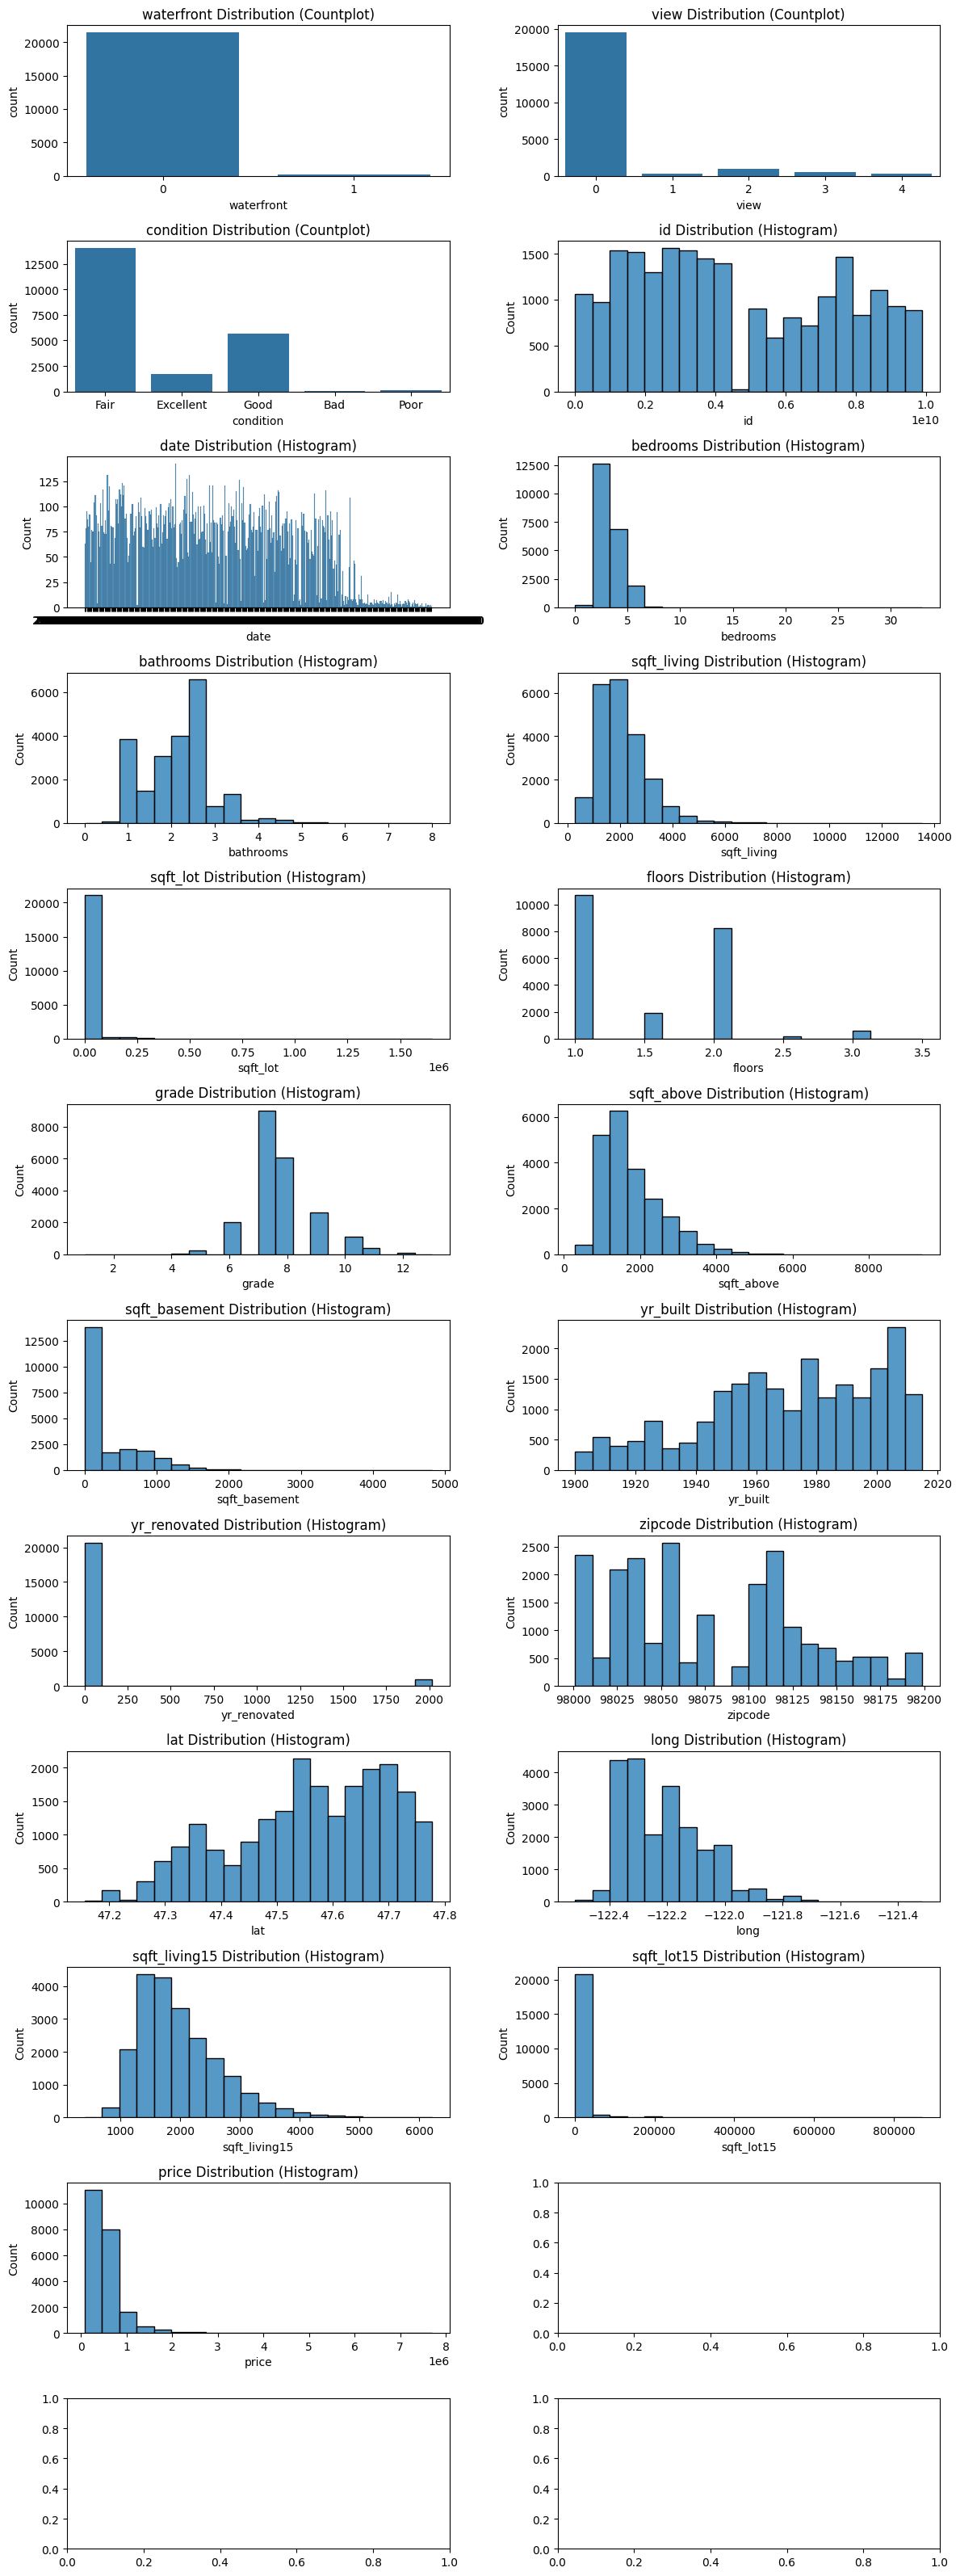

In [ ]:
#@title Plot the distribution for each columns

# Identify columns with <= 5 unique values for countplot
countplot_cols = [col for col in house.columns if house[col].nunique() <= 5]

# Identify columns with > 5 unique values for distribution plot
distplot_cols = [col for col in house.columns if col not in countplot_cols]

# Create subplots
fig, axes = plt.subplots(len(countplot_cols) + len(distplot_cols) // 2, 2, figsize=(12, 32))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(countplot_cols):
    sns.countplot(data=house, x=col, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{col} Distribution (Countplot)')

for i, col in enumerate(distplot_cols):
    sns.histplot(data=house, x=col, ax=axes[(i + len(countplot_cols)) // 2, (i + len(countplot_cols)) % 2], bins=20)
    axes[(i + len(countplot_cols)) // 2, (i + len(countplot_cols)) % 2].set_title(f'{col} Distribution (Histogram)')

# Show the plots
plt.tight_layout()
plt.show()

<ipython-input-12-3839609b06a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_corr = house.corr(method='pearson')


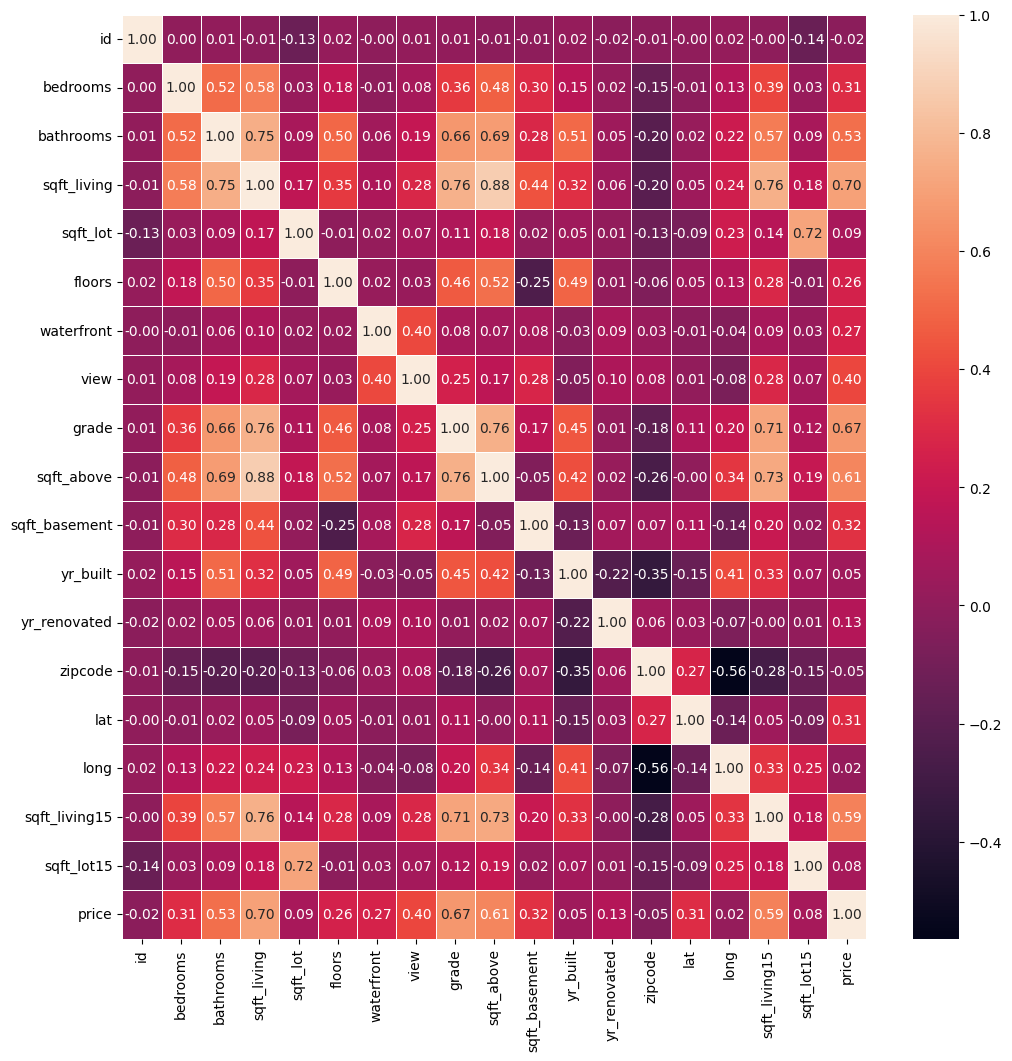

In [ ]:
# Find the pearson correlation
house_corr = house.corr(method='pearson')
plt.figure(figsize=(12,12))
sns.heatmap(house_corr, annot=True, linewidths=.5, fmt='.2f');

**Tips:** Tired of understanding the data with self-defined code? Let me introduce you with...

**"DataPrep"**: An automated exploratory data analysis tool to gain preliminary insights

## Intermezzo: DataPrep

In [ ]:
!pip install -U tornado --q
!pip install dataprep --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.4/435.4 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado==6.3.2, but you have tornado 6.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

In [ ]:
import dataprep.eda as de
import bokeh.io
bokeh.io.output_notebook()

In [ ]:
from dataprep.eda import plot, plot_correlation, create_report, plot_missing
report = create_report(house)
report.save('/content/report.html')

Computing isnull-1ab61f3c8fd6391bddd2d5999adba51e:   5%|▍         | 185/3778 [00:00<00:07, 479.50it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


Report has been saved to /content/report.html!


After running the code, the file will be saved in the File section.Download the `report.html` file from the File section located in the sidebar. Then, open it directly from your local browser.

Here are some screenshot previews from the HTML file.

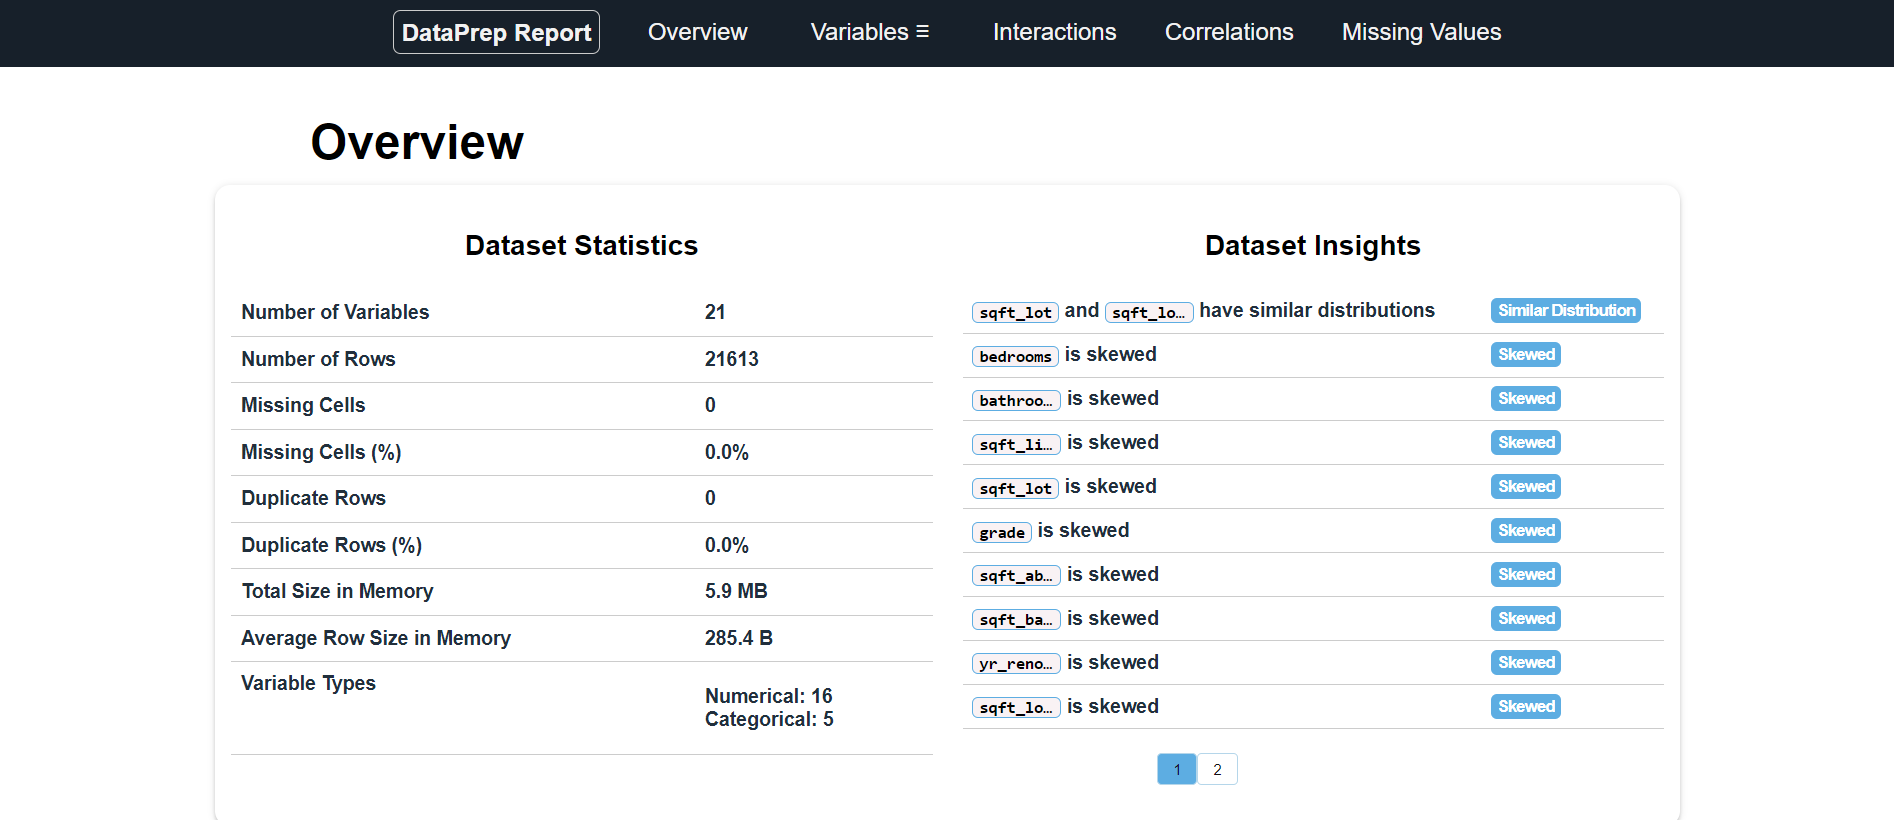

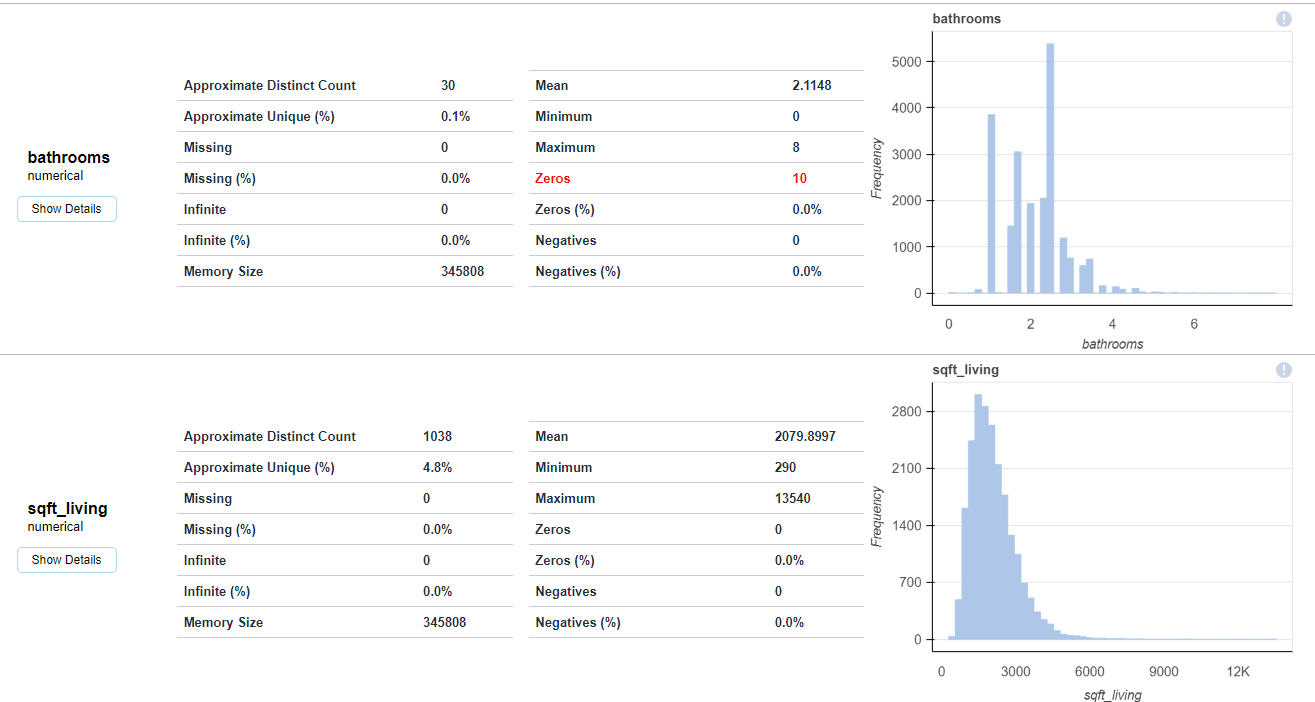

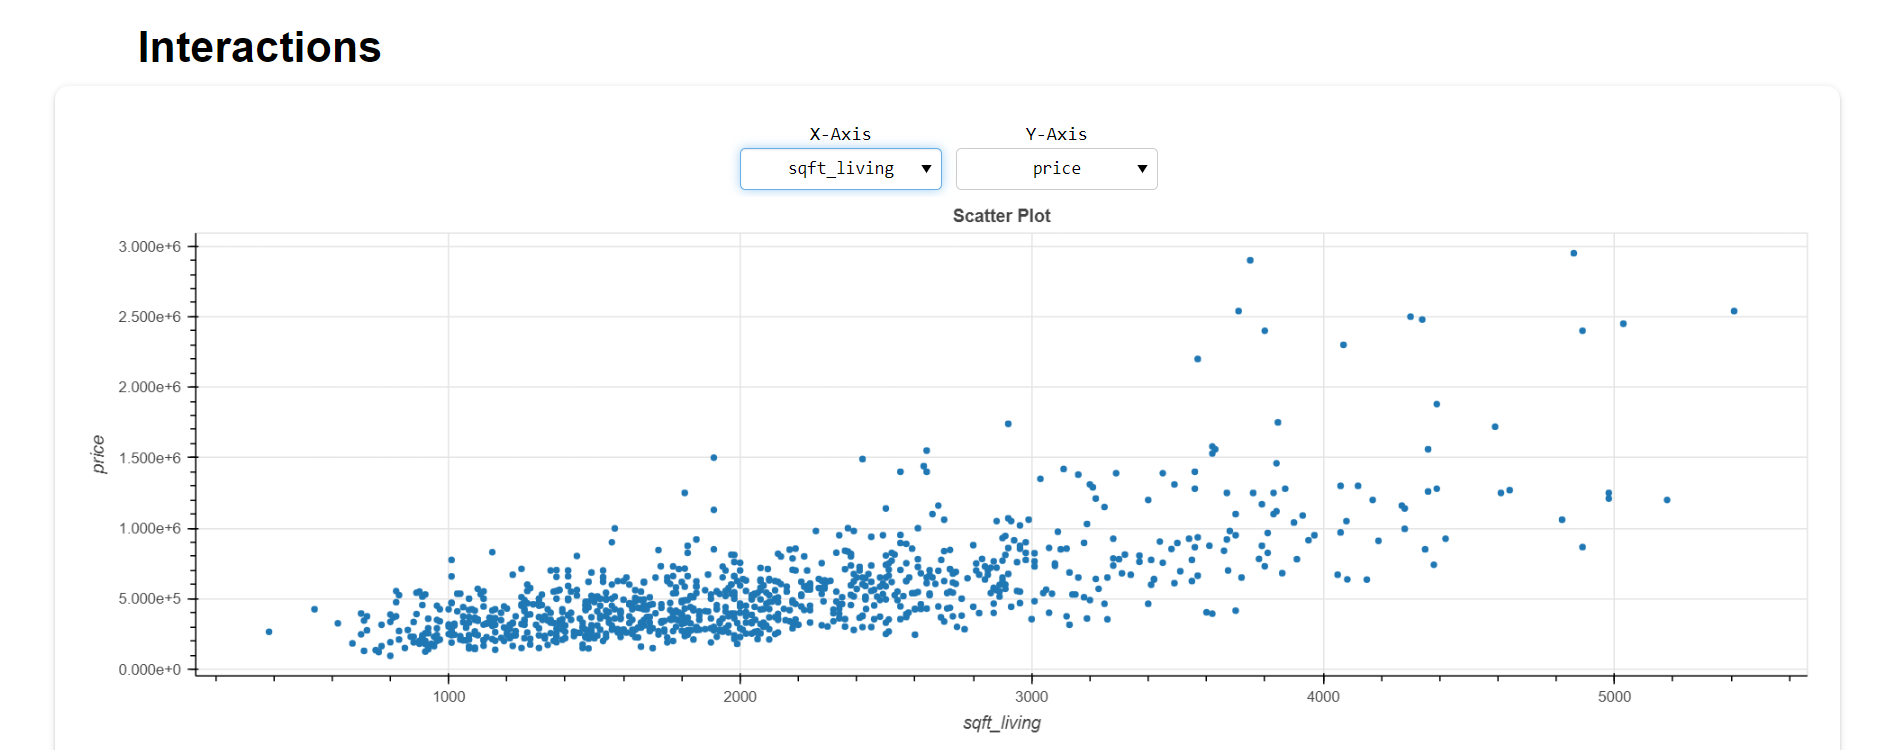

How fascinating that was!!

## **What are the insights?**

As we've seen, several of the features need to be processed and selected. Before diving into the feature engineering part, let's do some preprocessing.

Here are some of the insights:
* `id` column contains uniform distribution (meaningless)
* `condition` column could be converted to numerical features
* `yr_renovated` column mainly contains 0 value (meaning that it hasn't been renovated yet)
* `zipcode` column indicates a code so that it couldn't be treated as a numerical
* `view` and `waterfall` columns are significantly imbalanced
* `date` column has an inconsistent format (should be converted to date format)

In [ ]:
house.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,Fair,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,Fair,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,Fair,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,Excellent,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,Fair,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [ ]:
house_clean = house.copy()

# Drop the 'id' column
house_clean = house_clean.drop(columns=['id'])

# Convert the 'date' column to datetime format
house_clean['date'] = pd.to_datetime(house_clean['date'], format='%Y%m%dT%H%M%S')

# Convert the 'zipcode' column to string format
house_clean['zipcode'] = house_clean['zipcode'].astype(str)

In [ ]:
house_clean.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,Fair,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,Fair,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2015-02-25,2,1.00,770,10000,1.0,0,0,Fair,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,Excellent,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,Fair,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


The other columns will be manipulated in the ***feature engineering*** section

# **Feature Engineering House Price Dataset**

In [ ]:
house_clean.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,Fair,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,Fair,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0


## Categorical Feature Engineering

For the categorical features, we could convert it either with One-Hot or Ordinal Encoder

We convert categorical variables to one-hot encoding or ordinal encoding based on the nature and meaning of the categorical data.

1. **One-Hot Encoding**:
   - Use one-hot encoding when the categorical variable has no inherent order or ranking between its categories. Each category is treated as a separate binary feature/column.
   - Example: If you have a "Color" feature with categories "Red," "Blue," and "Green," you would use one-hot encoding because there is no inherent order or ranking among these colors.
   - One-hot encoding can lead to a high dimensionality when there are many categories, but it's suitable for nominal categorical variables.

2. **Ordinal Encoding**:
   - Use ordinal encoding when the categorical variable has a clear and meaningful order or ranking between its categories.
   - Example: If you have an "Education Level" feature with categories "High School," "Bachelor's," "Master's," and "Ph.D.," you would use ordinal encoding because there's a clear order from lower education levels to higher education levels.
   - Ordinal encoding assigns integer values to categories based on their rank or order. For example, "High School" might be 1, "Bachelor's" might be 2, and so on.
   - Ordinal encoding reduces dimensionality compared to one-hot encoding, as it uses a single numerical feature to represent the order.

In [ ]:
house_clean.select_dtypes('object').head()

,condition,zipcode
0,Fair,98178
1,Fair,98125
2,Fair,98028
3,Excellent,98136
4,Fair,98074


For a feature like "condition" with categories like "Fair," "Excellent," "Poor," "Bad," and "Good," you would typically use ordinal encoding because there is a clear order or ranking among the categories. You can assign integer values to these categories based on their perceived condition level. For example:

- "Bad" might be encoded as 1
- "Poor" might be encoded as 2
- "Fair" might be encoded as 3
- "Good" might be encoded as 4
- "Excellent" might be encoded as 5

In [ ]:
# Define the mapping of categories to ordinal values
condition_mapping = {
    'Bad': 1,
    'Poor': 2,
    'Fair': 3,
    'Good': 4,
    'Excellent': 5
}

# Apply ordinal encoding to the "condition" column
house_clean['condition'] = house_clean['condition'].map(condition_mapping)

For zipcodes, you typically wouldn't use ordinal encoding because zipcodes are usually not ordinal in nature. Zipcodes are identifiers for geographic regions, and there is no inherent order or ranking among them.

Instead, you should use one-hot encoding to represent zipcodes as binary features. Each unique zipcode should be transformed into a separate binary column (feature), indicating the presence or absence of that zipcode for each data point.

In [ ]:
# Perform one-hot encoding for the "zipcode" column
house_tmp = pd.get_dummies(house_clean[['zipcode']], columns=['zipcode'], prefix='zipcode')
print("Total addition columns:", house_tmp.shape[1])
house_tmp.head(3)

Total addition columns: 70


,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



If you find that one-hot encoding the postal codes results in a very sparse dataset and you prefer to reduce the dimensionality, you can consider using ordinal encoding with caution. However, it's essential to understand that ordinal encoding implies an order or ranking among the categories, and postal codes don't naturally possess such an order.

In [ ]:
# Create a list of unique zipcodes
unique_zipcodes = house_clean['zipcode'].unique()

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=[unique_zipcodes])

# Fit and transform the "zipcode" column
house_clean['zipcode'] = encoder.fit_transform(house_clean[['zipcode']])

In [ ]:
house_clean.head(3)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.0,47.5112,-122.257,1340,5650,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1.0,47.7210,-122.319,1690,7639,538000.0
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2.0,47.7379,-122.233,2720,8062,180000.0


## Derived Feature Extraction

Derived feature extraction is the process of creating new features (variables) from existing ones in a dataset

1. Converting latitude (lat) and longitude (long) coordinates into human-readable location information through reverse geocoding can be a useful and informative addition

In [ ]:
!pip install reverse-geocode --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import reverse_geocode
lats=house_clean['lat'].to_list()
lons=house_clean['long'].to_list()
coords = list(zip(lats, lons))
coords[:5]

[(47.5112, -122.257),
 (47.721, -122.319),
 (47.7379, -122.233),
 (47.5208, -122.393),
 (47.6168, -122.045)]

In [ ]:
# Example of reverse geocoding to convert lat & long features
reversed = reverse_geocode.search(coords)
cities = [loc['city'] for loc in reversed]
cities[:5]

['Bryn Mawr-Skyway',
 'Shoreline',
 'Inglewood-Finn Hill',
 'White Center',
 'City of Sammamish']

In [ ]:
print("Number of rows:",len(cities))
print("Number of unique cities:",len(set(cities)))

Number of rows: 21613
Number of unique cities: 81


In [ ]:
house_clean['city'] = cities

# Create a list of unique cities
unique_cities = house_clean['city'].unique()

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=[unique_cities])

# Fit and transform the "city" column
house_clean['city'] = encoder.fit_transform(house_clean[['city']])

In [ ]:
house_clean.head(2)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.0,47.5112,-122.257,1340,5650,221900.0,0.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1.0,47.7210,-122.319,1690,7639,538000.0,1.0


2. Breaking down the date into year, month, and day components allows for more granular temporal analysis. This can help identify trends, patterns, and seasonality in the data that may not be apparent when using the date as a whole.

In [ ]:
# Convert the "date" column to datetime format
house_clean['date'] = pd.to_datetime(house_clean['date'])

# Extract year, month, and day components
house_clean['year'] = house_clean['date'].dt.year
house_clean['month'] = house_clean['date'].dt.month
house_clean['day'] = house_clean['date'].dt.day

# Drop the "date" column
house_clean = house_clean.drop(columns=['date'])

In [ ]:
house_clean.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.0,47.5112,-122.257,1340,5650,221900.0,0.0,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1.0,47.7210,-122.319,1690,7639,538000.0,1.0,2014,12,9


## (Optional) Feature Manipulation

Feature manipulation is a technique to manipulate the value of some features. Most of feature engineering (including this one) often involves a degree of trial and error. It's an iterative process where you experiment with different transformations, combinations, and selections of features to find the most informative and relevant ones for your specific machine learning task

For example, the "yr_renovated" column can be redefined with the following interpretation: a value of 1 indicates that a house has been renovated, while any other value represents 0, indicating no renovation.

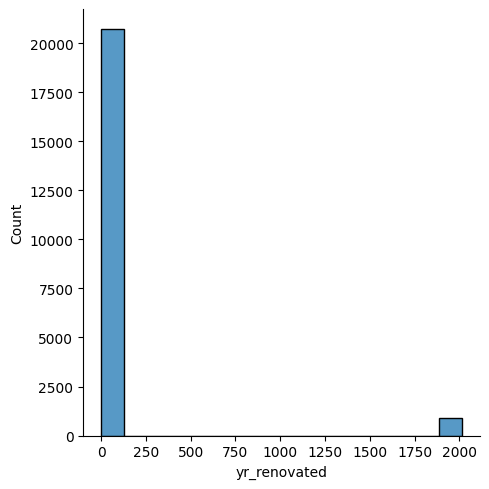

In [ ]:
sns.displot(house_clean['yr_renovated']);

In [ ]:
# Modify the "yr_renovated" values
house_clean_copy = house_clean.copy()
house_clean_copy['yr_renovated'] = house_clean_copy['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
house_clean_copy.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,city,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,0.0,47.5112,-122.257,1340,5650,221900.0,0.0,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1,1.0,47.7210,-122.319,1690,7639,538000.0,1.0,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2.0,47.7379,-122.233,2720,8062,180000.0,2.0,2015,2,25


## Spoiler Ahead !!

How to evaluate the quality of a feature?

Machine learning models can be used as a tool to assess the importance or relevance of a feature within the context of a specific prediction task

In [ ]:
#@title The total errors before data preprocessing and feature engineering.
# Separate the features and target variable
X = house.drop(columns=['price'])  # Features
y = house['price']               # Target

# Initialize the OrdinalEncoder
label_encoder = OrdinalEncoder()

# Apply OrdinalEncoder to all categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[[col]])

# Initialize the Decision Tree Regressor with a random seed of 42
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation using RMSE as the scoring metric
# We'll use negative RMSE to align with sklearn convention (higher is better)
rmse_scores = cross_val_score(dt_regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Calculate the average RMSE across cross-validation folds
average_rmse = -rmse_scores.mean()

# Print the average RMSE
print("Average RMSE:", average_rmse)

Average RMSE: 186388.26534446265


In [ ]:
#@title The total errors after data preprocessing and feature engineering.
X = house_clean.drop(columns=['price'])  # Features
y = house_clean['price']               # Target

# Initialize the Decision Tree Regressor with a random seed of 42
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation using RMSE as the scoring metric
# We'll use negative RMSE to align with sklearn convention (higher is better)
rmse_scores = cross_val_score(dt_regressor, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Calculate the average RMSE across cross-validation folds
average_rmse = -rmse_scores.mean()

# Print the average RMSE
print("Average RMSE:", average_rmse)

Average RMSE: 182896.27347053203


Based on the result, it appears that data preprocessing and feature engineering have had a positive impact on the model's performance. The error decreased from 186,388.27 to 182,896.27

We'll delve deeper this material in the upcoming class

# **Assignment: Feature Engineering Study Case**

**Case: Predicting Passing Grades for a University Major**

Imagine you are a data scientist working for a government agency focused on education. Your mission is to develop a robust model to predict the passing grades of a specific major at a prestigious university for the upcoming academic years. Accurate predictions will help the government allocate resources effectively and implement targeted interventions to support students' success.

## Introduction

You are given a dataset about UTBK scores for science in 2019. UTBK is an Indonesian national college entrance exam for the admission of new students in state universities using written examinations, which has various advantages, both for college applicants, public universities, and national interests.

The data given were samples collected through a survey, not from the entire UTBK participant. From this dataset, you are expected to predict the accurate passing grade of each study program in that year (2019) from the data (bias correction), although it might be biased.

Here are references for the real characteristics of UTBK scores published by LTMPT. LTMPT is an Indonesian institution responsible for conducting the national entrance examination for higher education institutions, particularly universities.

(The image below is written in Indonesia as it's released by Indonesian government)

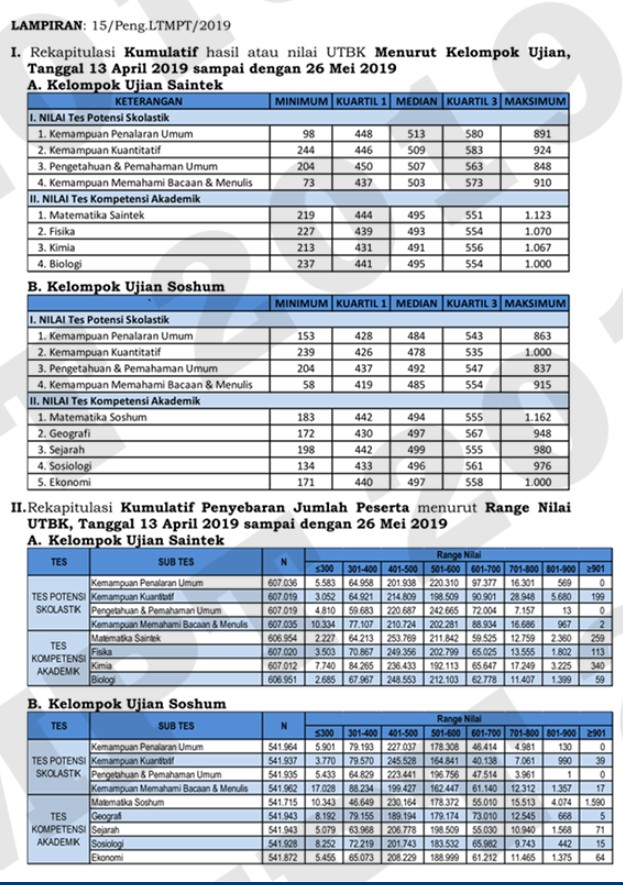

## Data Description

There are **4 datasets** in this study case.

**- skor_saintek.csv :** science score 2019 references
Consists of ***sample*** scores of participants choosing science majors
1. id_prodi_pil1: first choice major id
2. id_universitas_pil1: first choice university id
3. id_prodi_pil2: second choice major id
4. id_universitas_pil2: second choice university id
5. id_siswa: participant id
6. skor_bio: biology score
7. skor_fis: physics score
8. skor_kim: chemistry score
9. skor_mat: math score
10. skor_kmb: "kemampuan memahami bacaan dan menulis" score
11. skor_kpu: "kemampuan penalaran umum" score
12. skor_kua: "kemampuan kuantitatif" score
13. skor_ppu: "pengetahuan dan pemahaman umum" score

**- universitas.csv :** university references
1. id_universitas: university id
2. nama_universitas: university name

**- rank_prodi.csv:** university major and selection rigor
1. rank: the bigger the rank, the greater the acceptance probability
2. id_prodi: major id
3. prodi-universitas: major and university name
4. id_universitas: university id
5. wilayah: region id
6. peminat_2017: number of applicants in 2017
7. kapasitas_2018: number of major capacities in 2018
8. peminat_2018: number of applicants in 2018
9. kapasitas_2019: number of major capacities in 2019

**- passing_grade.csv:**
Consists of actual information about certain majors from the entire population set (example: avg_nilai_lolos is the ***real*** average score above passing grade for that major in 2019)
1. id_prodi: major id
2. avg_nilai_lolos: average score above passing grade
3. std_nilai_lolos: standard deviation on the score above passing grade
4. nilai_tertinggi: the highest score in that major
5. passing grade: target variable, the passing grade of a certain major in university

Feel free to explore more about the dataset and for portfolio purpose. This dataset is 100% authentic without modification or artificial data. It was scrapped from the eduka survey platform.

Reference: https://www.kaggle.com/datasets/ekojsalim/indonesia-college-entrance-examination-utbk-2019

Credits:
* This data was scrapped by Eko Julianto Salim (CSUI'19)
* This challenge was constructed by Bryan Tjandra, Jaycent Gunawan, and Maureen Esther

## Prerequisities

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Data Understanding

In [ ]:
# You could run this code to download the dataset from google drive
meta_url = 'https://drive.google.com/uc?export=download&confirm=pbef&id='

# universitas.csv
id_univ = '1vqKU5Ckh_9mpkoJeNzo3D0RhH25kewa-'
output_path = '/content/universitas.csv'
urllib.request.urlretrieve(meta_url+id_univ, filename=output_path)

# skor_saintek.csv
id_skor_saintek = '1awnZ-SnFFV9x1hbBgsmIMicqQ63WdenW'
output_path = '/content/skor_saintek.csv'
urllib.request.urlretrieve(meta_url+id_skor_saintek, filename=output_path)

# rank_prodi.csv
id_univ = '1reroTr-oCV7rzrL-yDOcmYoRqJnncXrC'
output_path = '/content/rank_prodi.csv'
urllib.request.urlretrieve(meta_url+id_univ, filename=output_path)

# passing_grade.csv
id_grade = '10zJV0HowLR6f334tcOj-fpTk6rvRO8OY'
output_path = '/content/passing_grade.csv'
urllib.request.urlretrieve(meta_url+id_grade, filename=output_path)

('/content/passing_grade.csv', <http.client.HTTPMessage at 0x7e50ab048e50>)

In [ ]:
passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')

In [ ]:
passgrad.head(2)

,id_prodi,passing_grade
0,3511096,612.49
1,3621037,615.04


In [ ]:
skor.head(2)

,id_prodi_pil1,id_universitas_pil1,id_prodi_pil2,id_universitas_pil2,id_siswa,skor_bio,skor_fis,skor_kim,skor_kmb,skor_kpu,skor_kua,skor_mat,skor_ppu
0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562


In [ ]:
univ.head(2)

,id_universitas,nama_universitas
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH


In [ ]:
rank.head(2)

,rank,id_prodi,prodi-universitas,id_universitas,wilayah,peminat_2017,kapasitas_2018,peminat_2018,kapasitas_2019
0,1.0,3211015,Pendidikan Dokter - UI,321,1,4041.0,127.0,3955.0,72
1,2.0,3321073,Sekolah Tek. Elektro & Informatika (STEI) - ITB,332,1,4215.0,168.0,4804.0,168


## Question 1: Missing value (10)

The last 50 rows in the Rank dataframe has NaN values because they are new majors, so their empty values needs to be filled with something.
As a data scientist, impute missing values using the most reasonable justification and explain your reason.

In [ ]:
rank.tail(5)

,rank,id_prodi,prodi-universitas,id_universitas,wilayah,peminat_2017,kapasitas_2018,peminat_2018,kapasitas_2019
1696,NaN,6121202,ILMU KOMPUTER - Undiksha,612,3,NaN,NaN,NaN,24
1697,NaN,6121217,KEDOKTERAN - Undiksha,612,3,NaN,NaN,NaN,20
1698,NaN,7531143,FARMASI - USN,753,4,NaN,NaN,NaN,48
1699,NaN,8111343,TEKNIK GEOFISIKA - Unpatti,811,4,NaN,NaN,NaN,8
1700,NaN,8111351,TEKNIK PERMINYAKAN - Unpatti,811,4,NaN,NaN,NaN,8


In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')


rank['rank'].fillna(0, inplace=True)
rank.fillna(0, inplace=True)
print(rank.tail(5))


> Answer Here
There are a few reasons on why I picked to impute 0 towards the null values. The first one is representation, null values means the absence of data, therefore imputing 0 can be appropriate too. Second is anything related to numerical operations, if some of our data involve numerical operations, they can still be performed without any errors. Lastly, is due to data distribution, imputing it with 0 can help normalise the data distribution.

## Question 2: Student applicants and acceptance rate (20)

Several features can help us capture the relation associated with passing grade. For example, the number of interests can help us measure the popularity of a major or program among prospective students, reflecting their interest and preference. On the other hand, the admission tightness percentage allows us to understand the level of competitiveness for admission to that major, considering factors like the number of applicants and available slots. Extract these features and explain your argument.

Here some references of the expected result after applying the feature engineering process

**NOTES: The extracted feature values may differ from the references, as there are no definitive answers. As long as your argument is well-explained, you will still receive full score.**

After applying feature engineering:

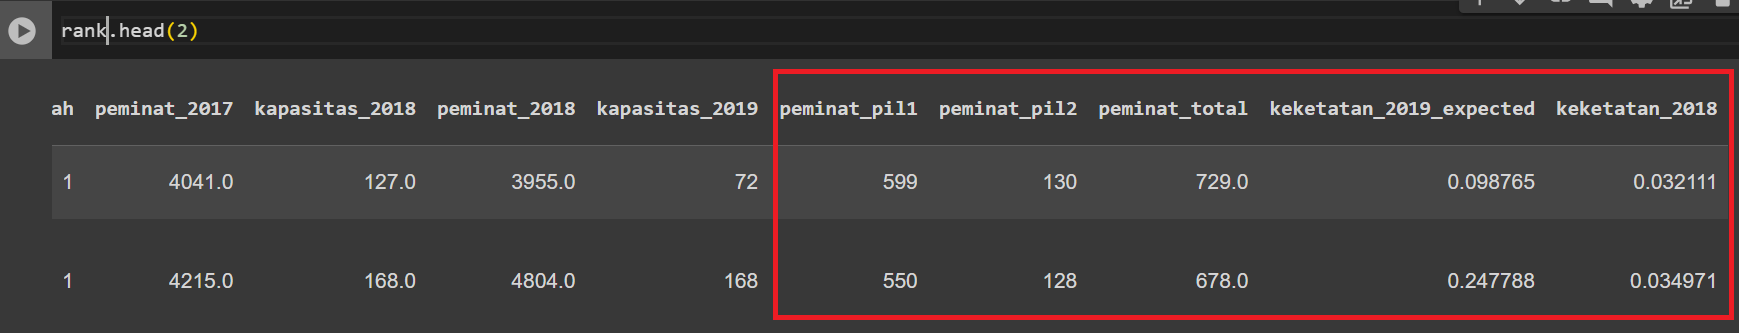

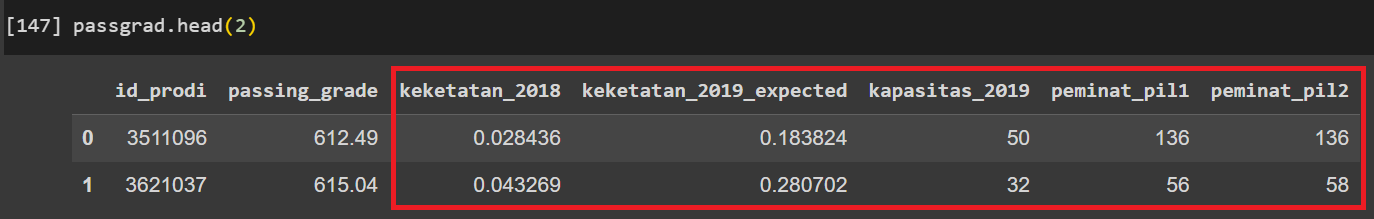

The features enclosed within the red boundary represent the added features.

Hint:
* You could join other tables in order to acquire the desired columns
* Admission tightness percentage could be determined from the proportion between capacity and interest

New features description:
* peminat_pil1: Total number of students who registered with the corresponding major in a university as their first choice
* peminat_pil2: Total number of students who registered with the corresponding major in a university as their second choice
* peminat_total: Sum of peminat_pil1 and peminat_pil2
* keketatan_2019_expected: Admission tightness percentage in 2019 that could be determined from the proportion between capacity and interest
* keketatan_2018: Admission tightness percentage in 2018 that could be determined from the proportion between capacity and interest

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')

# Merge rank and passgrad DataFrames
merged_df = pd.merge(rank, passgrad, on='id_prodi', how='inner')

# Calculate peminat_pil1 and peminat_pil2
merged_df['peminat_pil1'] = merged_df['peminat_2018']
merged_df['peminat_pil2'] = merged_df['peminat_2017'] - merged_df['peminat_2018']

# Calculate peminat_total
merged_df['peminat_total'] = merged_df['peminat_pil1'] + merged_df['peminat_pil2']

# Calculate keketatan_2019_expected and keketatan_2018
merged_df['keketatan_2019_expected'] = (merged_df['kapasitas_2019'] / merged_df['peminat_total']) * 100
merged_df['keketatan_2018'] = (merged_df['kapasitas_2018'] / merged_df['peminat_2018']) * 100

# Print the first few rows of the resulting DataFrame
print(merged_df.head())


> Answer Here
The merged dataframe now has additional features/columns like peminat_pil1, and peminat_pil2 that represents the number of applicants selecting each major as their first and second choice respectively. Not only that but peminat_total provides an overall measure of the program's popularity. Additionally, keketatan_2019_expected and keketatan_2018 capture the admission tightness percentage for the current and previous years, offering insights into the competitiveness of admission to each major. 

## Question 3: Calculate estimated student score (15)

Incorporating the "average score for each student" as a feature in our dataset can be considered to improve the performance. This feature provides a direct reflection of a student's academic performance throughout their coursework.

Here some references of the expected result after applying the feature engineering process

**NOTES: The extracted feature values may differ from the references, as there are no definitive answers. As long as your argument is well-explained, you will still receive full score.**

After applying feature engineering:

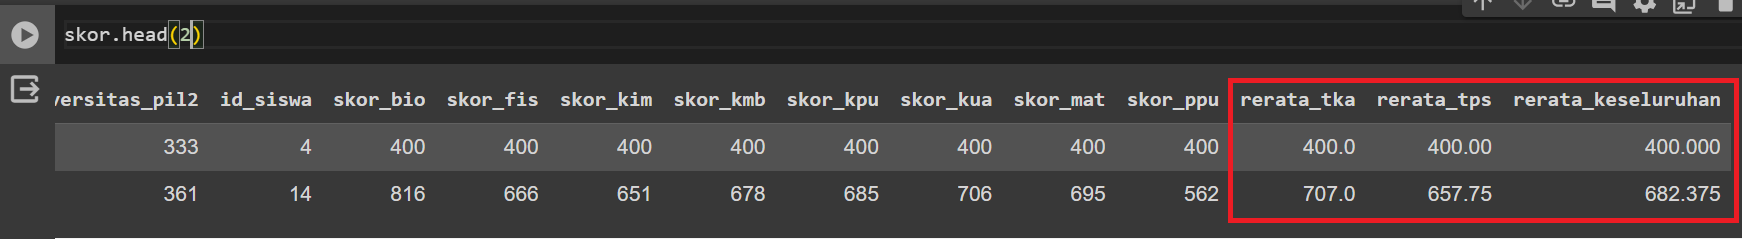

The features enclosed within the red boundary represent the added features.

Hint:
* Simple equations is sufficient to calculate the estimated score

New features description:
* rerata_tka: an average score of TKA group (consisting of skor_bio, skor_fis, skor_kim, skor_mat)
* rerata_tps: an average score of TPS group (consisting of skor_kmb, skor_kpu, skor_kua, skor_ppu)
* rerata_keseluruhan: an average score of TKA and TPS group

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')

# Calculate average score for TKA group
skor['rerata_tka'] = skor[['skor_bio', 'skor_fis', 'skor_kim', 'skor_mat']].mean(axis=1)

# Calculate average score for TPS group
skor['rerata_tps'] = skor[['skor_kmb', 'skor_kpu', 'skor_kua', 'skor_ppu']].mean(axis=1)

# Calculate overall average score
skor['rerata_keseluruhan'] = skor[['rerata_tka', 'rerata_tps']].mean(axis=1)

> Answer Here
Here I captured the means for the TKA and the TPS by finding the mean using .mean(). In addition to that I find the mean overall by using the mean of TKA and TPS. That way a singular metric is used that encapsulates a student's academic proficiency comprehensively.

## Question 4: Assess student eligibility (20)

**Do you understand how the passing grade determination process works?**

Here is a brief overview of the process: We begin by collecting scores from all applicants to a particular major and arrange them in descending order, from the highest to the lowest. Next, we select the top-N scores, where N represents the available capacity for that major. The lowest score among the top-N is typically considered the passing grade.

For instance, suppose the capacity for the Data Science major at the University of AI is 5. There are 10 applicants with corresponding scores:

`150, 151, 153, 154, 155, [156, 157, 158, 160, 165]`

The scores enclosed in brackets represent the top 5. Consequently, the passing grade is set at 156, as it is the lowest score among the top 5.

Does this imply that this technique always yields the most accurate passing grade?

* Not really, as this collected data is just sample (not the entire data), and the specific criteria for determining passing grades may vary depending on the university.

In this section, your task is to assess whether an individual is eligible for admission to the university they have applied to. Create the code and explain your process.

Here some references of the expected result after applying the feature engineering process

**NOTES: The extracted feature values may differ from the references, as there are no definitive answers. As long as your argument is well-explained, you will still receive full score.**

After applying feature engineering:

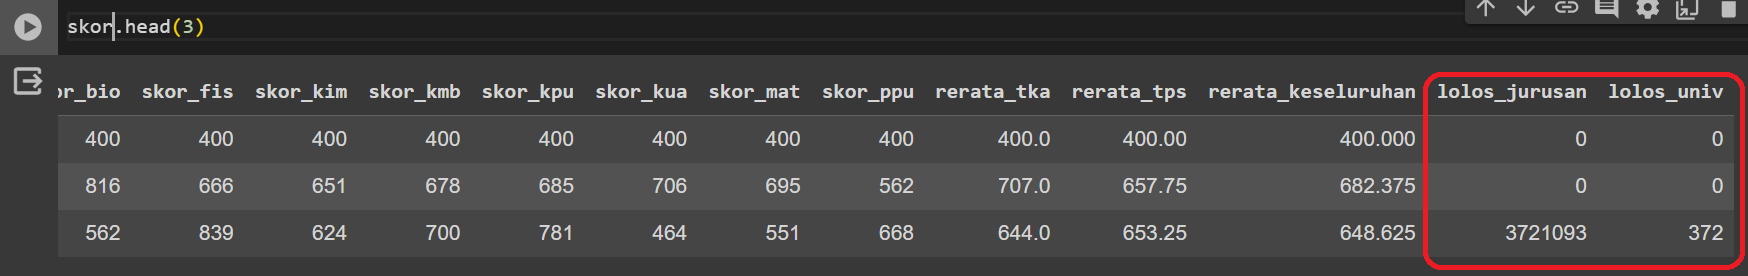

The features enclosed within the red boundary represent the added features.

On the above added features, it means that the first and second student dont get accepted in the university. On the other hand, the third student perhaps could get the major with the id `3721093` at the University with id `372`

Notes: "N" indicates number of capacity on the corresponding major

Simple Approach:
1. All of the students with the first choice and lay between the top-N score in a certain major will be accepted. In this case, we use top-(0.8*N) score
2. All of the students with the second choice and lay between the top-N score in a certain major will be accepted. Remember the student that has been accepted in the previous criteria must be excluded. In this case, we use top-(0.2*N) score
3. After finishing these steps, you should have the candidate students accepted to the university

Simple approach example:

* Capacity = 4
* Student scores:
  * Abang: 150 (1st choice)
  * Abing: 140 (1st choice)
  * Abeng: 130 (1st choice)
  * Abung: 120 (1st choice)
  * Abong: 150 (2st choice)
  * Acang: 145 (2st choice)
  * Acong: 120 (2st choice)
* First choice selection: ceil(0.8 * 3) = 3. Abang 150, Abing 140, and Abeng 130 were selected
* Second choice selection: ceil(0.2 * 3) = 1. Abong 150 was selected
* Final accepted students: Abang 150, Abing 140, Abeng 130, Abong 150

Hint:
* The capacity should be normalized. Why? Because this dataset is just a sample. For instance, if the entire student population is 600,000, and the dataset represents only 100,000 students, normalizing the capacity to 1/6 helps adjust it proportionally to the sample size. You could use any source to discover the total population who took part in UTBK in 2019
* This previous concept is just one of several approaches you can apply. Feel free to explore your own ideas to enhance the previous approach
* The scores coresponding to this task are the overall score

New features description:
* lolos_jurusan: the major id where the corresponding student is accepted. The value will be 0 if they're not accepted
* lolos_univ: the university id where the corresponding student is accepted. The value will be 0 if they're not accepted

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')

# Calculate average score for TKA group
skor['rerata_tka'] = skor[['skor_bio', 'skor_fis', 'skor_kim', 'skor_mat']].mean(axis=1)

# Calculate average score for TPS group
skor['rerata_tps'] = skor[['skor_kmb', 'skor_kpu', 'skor_kua', 'skor_ppu']].mean(axis=1)

# Calculate overall average score
skor['rerata_keseluruhan'] = skor[['rerata_tka', 'rerata_tps']].mean(axis=1)

#Define a function 'selection_system' that assigns students to majors based on selection criteria
def selection_system(selection: int, percentage: float):
    if 'lolos_univ' not in skor.columns:
        skor['lolos_univ'] = 0
    if 'lolos_jurusan' not in skor.columns:
        skor['lolos_jurusan'] = 0

    unassigned_students = skor[skor['lolos_univ'] == 0].copy()
    unassigned_students['rerata_tka'] = unassigned_students[['skor_bio', 'skor_fis', 'skor_kim', 'skor_mat']].mean(axis=1)
    unassigned_students['rerata_tps'] = unassigned_students[['skor_kmb', 'skor_kpu', 'skor_kua', 'skor_ppu']].mean(axis=1)
    unassigned_students['rerata_keseluruhan'] = unassigned_students[['rerata_tka', 'rerata_tps']].mean(axis=1)
    total_population = len(skor['id_siswa'].unique())
    for major in tqdm(rank['id_prodi']):
        try:
            capacity = rank[rank['id_prodi'] == major]['kapasitas_2019'].iloc[0] / total_population
        except IndexError:
            continue
        num_accepted = int(np.ceil(capacity * percentage * total_population))
        accepted_student_id = unassigned_students[unassigned_students['id_prodi_pil1'] == major].nlargest(num_accepted, 'rerata_keseluruhan').index
        unassigned_students.loc[accepted_student_id, 'lolos_jurusan'] = major
        unassigned_students.loc[accepted_student_id, 'lolos_univ'] = unassigned_students.loc[accepted_student_id, 'id_universitas_pil1']
    return unassigned_students

accepted_students = selection_system(selection=1, percentage=0.8)
print(accepted_students)


In [ ]:
selection_system(selection=1, percentage=0.8)
selection_system(selection=2, percentage=0.2)

> Answer Here

The selection_system function plays a crucial role in determining the eligibility of students for admission to their preferred universities and majors. By leveraging key selection criteria such as average scores and available capacities, the function efficiently assigns students to majors while adhering to predefined admission percentages. This process ensures a fair and systematic approach to university admissions, optimizing the allocation of available slots based on students' academic performance and program preferences. Through the diligent implementation of this function, universities can streamline their admission processes and provide equal opportunities to deserving candidates.

## Question 5: Predict Passing Grade (20)

After determining the students who are potentially pass the university administration, calculate the passing grade without any machine learning method !

Here some references of the expected result after applying the feature engineering process

**NOTES: The extracted feature values may differ from the references, as there are no definitive answers. As long as your argument is well-explained, you will still receive full score.**

After applying feature engineering:

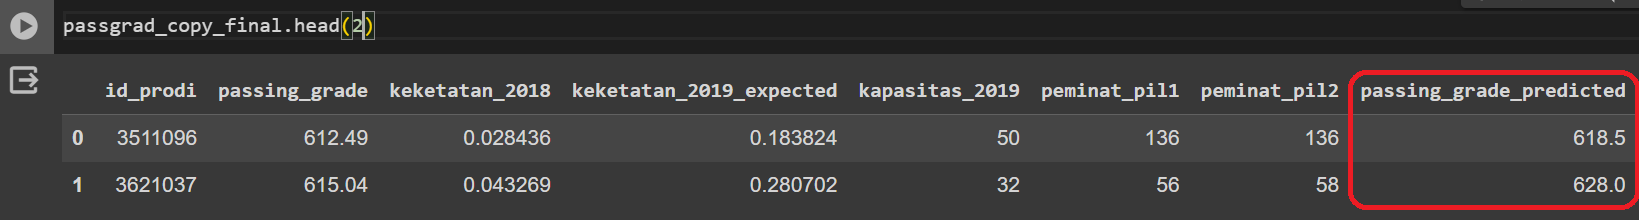

The features enclosed within the red boundary represent the added features.

Hint:
* Passing grade is the threshold value or minimum value that must be obtained or could be interpreted as the lowest value among the top-N students' scores.

In [ ]:
# Utils
import numpy as np
import pandas as pd
import urllib.request
from tqdm import tqdm
pd.set_option('display.max_columns', None)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

passgrad = pd.read_csv('passing_grade.csv')
skor = pd.read_csv('skor_saintek.csv')
univ = pd.read_csv('universitas.csv')
rank = pd.read_csv('rank_prodi.csv')

# Calculate average score for TKA group
skor['rerata_tka'] = skor[['skor_bio', 'skor_fis', 'skor_kim', 'skor_mat']].mean(axis=1)

# Calculate average score for TPS group
skor['rerata_tps'] = skor[['skor_kmb', 'skor_kpu', 'skor_kua', 'skor_ppu']].mean(axis=1)

# Calculate overall average score
skor['rerata_keseluruhan'] = skor[['rerata_tka', 'rerata_tps']].mean(axis=1)

#Define a function 'selection_system' that assigns students to majors based on selection criteria
def selection_system(selection: int, percentage: float):
    if 'lolos_univ' not in skor.columns:
        skor['lolos_univ'] = 0
    if 'lolos_jurusan' not in skor.columns:
        skor['lolos_jurusan'] = 0

    unassigned_students = skor[skor['lolos_univ'] == 0].copy()
    unassigned_students['rerata_tka'] = unassigned_students[['skor_bio', 'skor_fis', 'skor_kim', 'skor_mat']].mean(axis=1)
    unassigned_students['rerata_tps'] = unassigned_students[['skor_kmb', 'skor_kpu', 'skor_kua', 'skor_ppu']].mean(axis=1)
    unassigned_students['rerata_keseluruhan'] = unassigned_students[['rerata_tka', 'rerata_tps']].mean(axis=1)
    total_population = len(skor['id_siswa'].unique())
    for major in tqdm(rank['id_prodi']):
        try:
            capacity = rank[rank['id_prodi'] == major]['kapasitas_2019'].iloc[0] / total_population
        except IndexError:
            continue
        num_accepted = int(np.ceil(capacity * percentage * total_population))
        accepted_student_id = unassigned_students[unassigned_students['id_prodi_pil1'] == major].nlargest(num_accepted, 'rerata_keseluruhan').index
        unassigned_students.loc[accepted_student_id, 'lolos_jurusan'] = major
        unassigned_students.loc[accepted_student_id, 'lolos_univ'] = unassigned_students.loc[accepted_student_id, 'id_universitas_pil1']
    return unassigned_students

accepted_students = selection_system(selection=1, percentage=0.8)

# Sort the accepted students DataFrame in descending order based on their overall average scores
accepted_students_sorted = accepted_students.sort_values(by='rerata_keseluruhan', ascending=False)

# Calculate the passing grade for each major
passing_grades = {}
for major in accepted_students_sorted['lolos_jurusan'].unique():
    top_n_scores = accepted_students_sorted[accepted_students_sorted['lolos_jurusan'] == major]['rerata_keseluruhan'].values
    passing_grade = min(top_n_scores)
    passing_grades[major] = passing_grade

# Add a new column named 'passing_grade_predicted' to the DataFrame
accepted_students['passing_grade_predicted'] = accepted_students['lolos_jurusan'].map(passing_grades)

# Display the DataFrame with the new column
print(accepted_students)


> Answer Here

After identifying the students eligible for university admission, the next step is to compute the passing grade without resorting to machine learning techniques. By leveraging the average scores of these eligible students across various subjects and assigning them to their respective majors based on predefined selection criteria, we can determine the passing grade for each major. This involves sorting the eligible students in descending order of their overall average scores and extracting the lowest score among the top-N students as the passing grade. This calculated passing grade is then assigned to each corresponding major, facilitating a fair and transparent admission process.

**Try to calculate the error passing grade that you've predicted without machine learning. My previous simple method yielded a root mean squared error (RMSE) of 16.98, which means your average error from the passing grade prediction is around 16.98. Try it yours :D**

## Question 6: Feature Scaling (Bonus 5)

Before delving into the Modeling phase, we usually normalize the data first. Create the code to scale the features.

> Answer Here

## Question 7: Conclusion (15)

Based on the previous attempt, feature engineering is one of the most important technique in the Data Science field. By obtaining a substantial feature, you could boost your performance.

In a few lines, list out the most fascinating things you've found along this feature engineering process

> Answer
In conclusion, the feature engineering process has been an enlightening journey that has provided me with valuable insights and skills. By understanding the data more deeply, fostering creativity and innovation, tailoring solutions to specific problems, and observing the tangible impact on model performance, I have come to appreciate the crucial role of feature engineering in driving the success of data science endeavors. It has underscored the importance of thoughtful and strategic feature selection and manipulation in extracting meaningful information from raw data and building accurate predictive models. Overall, feature engineering stands out as a cornerstone of effective data science practice, shaping the way we uncover patterns, solve problems, and derive actionable insights from data.
